<a href="https://colab.research.google.com/github/Terrencebosco/Build_week_2/blob/master/build_week_2_(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cleaning a formatting data set 1

In [ ]:
#### for data set1

# # read in data set 1
# url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/build_week_2_data_2.csv'

# df = pd.read_csv(url)

# # feature engineering

# # drop na
# df = df.dropna(axis=0)

# # new feature for car year
# df['Car_year'] = df['car'].str.slice(stop=4)

# # # # remove car year from car feature
# # df['Car'] = df['Car'].str[4:]

# # # get make of car feature
# # df['Make'] = df['Car'].str.split().str.get(0)

# # # remove make of car from 'car' feature
# # df['Car'] = df['Car'].str.split(n=1).str[1]

# # remove mini from "cooper" from 'Car' for consistancey
# df['Make'] = df['Make'].replace('MINI','MINI Cooper')

# # remove "cooper" from 'car' feature and add to 'Make' feature, for consistancy
# df['Car'] = df['Car'].mask(df['Car'].str.contains('Cooper'),df['Car'].str.replace('Cooper',''))

# # # change int color for consistancy
# df['Int_color'] = df['Int_color'].replace({
#     'Othe':'Other',
#     'Brow':'Brown',
#     'Silve':'Silver',
#     'Gree':'Green'
# })

# # # change ext color for consistancy
# df['Ext_color'] = df['Ext_color'].replace({
#     'Othe':'Other',
#     'Brow':'Brown',
#     'Silve':'Silver',
#     'Gree':'Green'
# })

## Cleaning and formatting data set 2

In [519]:
# imports
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# read in data
url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/test_data_2'
df = pd.read_csv(url)

# remove rows that do not match format of columns (out of order when scraped)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('Stock:')]

# remove 'certified'
df['car'] = df['car'].mask(df['car'].str.contains('Certified'),df['car'].str.replace('Certified',''))

df['car'] = df['car'].mask(df['car'].str.contains('Mileage:'),df['car'].str.replace('Mileage:',''))

# remove spaces in front car names
df['car'] = df['car'].str.strip(' ')

# new feature for car year
df['car_year'] = df['car'].str.slice(stop=4)

# remove car year from car feature
df['car'] = df['car'].str[5:]

# # get make of car feature
df['Make'] = df['car'].str.split().str.get(0)

# remove make of car from 'car' feature
df['car'] = df['car'].str.split(n=1).str[1]

# remove mini from "cooper" from 'Car' for consistancey
df['Make'] = df['Make'].replace('MINI','MINI Cooper')

# remove "cooper" from 'car' feature and add to 'Make' feature, for consistancy
df['car'] = df['car'].mask(df['car'].str.contains('Cooper'),df['car'].str.replace('Cooper',''))

# make new color feature

## ext color
df['ext_color'] = df['ext_color'].str.strip('Exterior Color:')
## int color
df['int_color'] = df['int_color'].str.strip('Interior Color:')

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('Interior Color')]

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('VIN')]

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains(':')]

# create engine size feature
df[['size','engine']] = df['engine'].str.split(n=1, expand=True)

# make new features based on engine

## has flex fuel
df['flex_fuel'] = np.where(df['engine'].str.contains('Flexible Fuel', case=False), 1, 0)
## is hybrid
df['hybrid'] = np.where(df['engine'].str.contains('Hybrid', case=False), 1, 0)
## has turbo
df['turbo'] = np.where(df['engine'].str.contains('turbo', case=False), 1, 0)

# drop missing values 
df.fillna(value=np.nan, inplace=True)
df.dropna(inplace=True)

# remove unwanted strings from price
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')

# remove unwanted strings from mileage
df['mileage'] = df['mileage'].replace('-- ',np.nan)
df['mileage'] = df['mileage'].str.replace(',', '')
df['mileage'] = df['mileage'].str.replace('miles', '')

# color formatting
## replace car colors with known color 
df.loc[df['ext_color'].str.contains('Maroon'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Magnetic'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Green'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Gold'), 'ext_color'] = 'Gold'
df.loc[df['ext_color'].str.contains('Sea'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Brown'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('Metal'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Cherry'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Pea'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Indigo'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Tan'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Titanium'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Yellow'), 'ext_color'] = 'Yellow'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Silv'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Grey'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('White'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Black'), 'ext_color'] = 'Black'
df.loc[df['ext_color'].str.contains('Blu'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Graph'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Granite'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Powd'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Gun'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Burgundy'), 'ext_color'] = 'Red'

## format known int car color
df.loc[df['int_color'].str.contains('Black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Gray'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Beig'), 'int_color'] = 'Beige'
df.loc[df['int_color'].str.contains('black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Blu'), 'int_color'] = 'Blue'
df.loc[df['int_color'].str.contains('BLACK'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('GRAY'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Grey'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Browns'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Brown'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ta'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Medium Light S'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Ebony'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ash'), 'int_color'] = 'Gray'

# get list of colors i want
int_color =  df['int_color'].value_counts().head(5).index.to_list()

# chance all colors no known to 'other' (from list)
df.loc[~df['int_color'].isin(car_color), 'int_color'] = 'Other'

# get list of colors i want
car_color =  df['ext_color'].value_counts().head(10).index.to_list()

# chance all colors no known to 'other' (from list)
df.loc[~df['ext_color'].isin(car_color), 'ext_color'] = 'Other'

# change type for numeric features 
df['price'] = pd.to_numeric(df['price'])
df['mileage'] = pd.to_numeric(df['mileage'])

# remove outliers
df = df[df['mileage']<=250000]

# re index data frame
df = df.reindex()

# shape
df.shape

(2307, 16)

In [525]:
## make csv for git up 
# df.to_csv('clean_data_set_2_v2', index=False)

## EDA data set 2

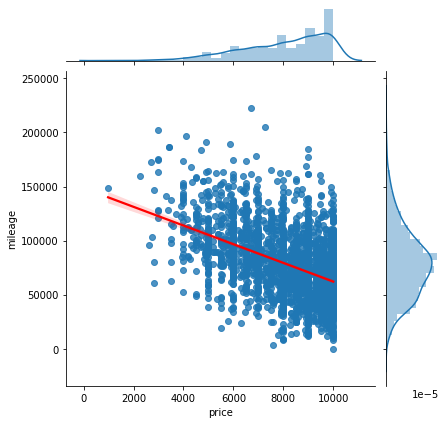

In [416]:
# quick plot price vs mileage
sns.jointplot(x="price", y="mileage", data=df, kind='reg',joint_kws={'line_kws':{'color':'red'}});

## model selection data set 2

In [437]:
# get base line prediction and measn absolute score

#. get mean
price_mean = df['price'].mean()

#. get prediction with mean
y_pred = [price_mean] * len(df['price'])

#. get base line score
baseline = mean_absolute_error(y_pred,df['price'])
                               
print(f'Baseline error of {baseline:.2f} if mean was used')

Baseline error of 1381.91 if mean was used


In [523]:
# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

##################### test ###########################

# one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# scale encoded
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# lasso prediction
lasso = linear_model.Lasso()
lasso.fit(X_train_encoded,y_train)
y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)

920.6190886455197

In [275]:
# check shape 
print('Splits shape:', train.shape, val.shape, test.shape)
print('Feature matrix shape:', X_train.shape, X_val.shape, X_test.shape)
print('Target vector shape:', y_train.shape, y_val.shape, y_test.shape)

Splits shape: (1536, 12) (384, 12) (480, 12)
Feature matrix shape: (1536, 11) (384, 11) (480, 11)
Target vector shape: (1536,) (384,) (480,)


In [ ]:
# # ordinal encoding
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)

# X_val_encoded = encoder.transform(X_val)

In [451]:
# one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

X_val_encoded = encoder.transform(X_val)

In [455]:
# one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

X_val_encoded = encoder.transform(X_val)

# scale encoded
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)

X_val_scaled = scaler.transform(X_val_encoded)

# lasso prediction
lasso = linear_model.Lasso()

lasso.fit(X_train_encoded,y_train)

y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)

959.6593367634464

In [453]:
# lasso prediction
lasso = linear_model.Lasso()

lasso.fit(X_train_encoded,y_train)

y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)

959.3888986234053

In [281]:
# ridge regression prediction
ridge = linear_model.Ridge(alpha=.01)

ridge.fit(X_train_encoded,y_train)

y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)

998.4969908977156

In [280]:
# ridgeCV prediction
ridge_cv = linear_model.RidgeClassifierCV(alphas=[.1])

ridge_cv.fit(X_train_encoded,y_train)

y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)

998.4969908977156

In [282]:
# simple pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    LinearRegression(),
)

# simple ML prediction
pipeline.fit(X_train, y_train);

In [283]:
# simple model mean_absolute_error score.
y_pred = pipeline.predict(X_val)

mean_absolute_error(y_val, y_pred)

1948632294.9774125